<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**9.1: Base-N and Binary**\
In everyday life we use the base 10 decimal system with digits 0-9\
Computers use binary which is the base 2 decimal system with digits 0 and 1

In [180]:
#Decimal expansion of 950.1
950.1 == 9*(10**2) + 5*(10**1) + 0*(10**0) + 1*(10**-1)

True

In [181]:
#Base 6 to decimal. 3514 (base 6) to decimal (base 10)
3*(6**3) + 5*(6**2) + 1*(6**1) + 4*(6**0)

838

In [182]:
#Base 10 to binary. 53 (base 10) to binary.
#53 is 32 + 16 + 4 +1 = 1*2**5 + 1*2**4 + 0*2**3 + 1*2**2 + 0*2**1 + 1*2**0 = 53
# So 53 in binary is 110101
#check using bin() function
bin(53) #0b prefix represents binary number to help differentiate between base 10

'0b110101'

In [183]:
#Binary to base 10. 10111 (binary) to base 10
1*2**4 + 0*2**3 + 1*2**2 + 1*2**1 + 1*2**0

23

In [184]:
#use int() funtion to convert binary to decimal
int(0b10111)

23

In [185]:
#addition in binary. adding 105 and 45 in binary
a = bin(105)
b = bin(45)
print("",a , "\n+",b)
print("=", )
print(bin(0b1101001 + 0b101101)) # binary numbers can be added the same way as decimal numbers
int(0b10010110)

 0b1101001 
+ 0b101101
=
0b10010110


150

In [186]:
#multiplication in binary. multiplying 105 and 45 in binary
a = bin(105)
b = bin(45)
print("",a , "\n*",b)
print("=", )
print(bin(0b1101001 * 0b101101)) # binary numbers can be multiplied the same way as decimal numbers
int(0b1001001110101)

 0b1101001 
* 0b101101
=
0b1001001110101


4725

**9.2: Floating Point Numbers**\
A float in Python is double precision meaning it can hold 64 bits. 1 bit for sign, 11 bits for exponent and 52 bits for fraction

In [187]:
import sys
sys.float_info #this gives float info such as max which is the largest 64 bit number


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

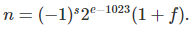\
formula for representing float

In [188]:
#converting IEEE754 number to base 10 number.
#Converting 0 10000001010 1100000000000000000000000000000000000000000000000000 to base 10

s = 0
e = int(0b10000001010)
f = 1*(1/(2**1)) + 1*(1/(2**2))
(-1)**s*(2**(e-1023))*(1+f) #formula for representing float

3584.0

In [189]:
#converting 25.0 to IEEE754

s = 0
e = 4 + 1023
f = 25/16 - 1 #0.5625
f1 = 1*(1/(2**1)) + 0*(1/(2**2)) + 0*(1/(2**3)) + 1*(1/(2**4)) #0.5625 to fractions

print(s , bin(e), "0b1001000000000000000000000000000000000000000000000000")

0 0b10000000011 0b1001000000000000000000000000000000000000000000000000


In [190]:
#since floats have limited precision in a computer, there is a gap one number and the next.
#the spacing() function can show this gap

import numpy as np

print(np.spacing(15.0))

print(np.spacing(25.0))

print(np.spacing(1000.0))

print(np.spacing(1e10)) #we can see as the number increases, the gap decreases

1e10 == (1e10 + np.spacing(1e10)/5) #here demonstrates how the gap affects a float.
                                    #1e10 + 1/5 of the gap is represented the same as 1e10 in Python

1.7763568394002505e-15
3.552713678800501e-15
1.1368683772161603e-13
1.9073486328125e-06


True

In [191]:
#Overflow is when a float exceeds the max 64 bit size. Here we can see how Python reacts when max is exceeded
print(sys.float_info.max)
print(sys.float_info.max + 1e10)
print(sys.float_info.max + sys.float_info.max)

np.spacing(1.6976931348623157e+308)
#since the gap is so large at this high of a number adding 1e10 to the max resulted in the max

1.7976931348623157e+308
1.7976931348623157e+308
inf


1.99584030953472e+292

In [192]:
#Underflow is when a float exceeds the min 64 bit size. Here we can see how Python reacts when min is exceeded
print(sys.float_info.min)
print(sys.float_info.min - 1e-320)
sys.float_info.min - sys.float_info.min

2.2250738585072014e-308
2.2250738585062014e-308


0.0

**9.3: Round-off Errors**\
As seen before, there is a gap between numbers due to limited precision. This allows us to say that many floats in Python are an approximation. Round-off error is the difference between the approximation and its true value. Round-off error may seem small in some cases, but error can add up after multiple calculations. It's also a problem when using ==

In [193]:
#demonstration of an approximation
print("%.21f" % 0.1) # here we can see that 0.1 is actually an approximation
print("%.100f" % 0.5) #0.5 can be exactly stored in IEE754

0.100000000000000005551
0.5000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [194]:
#unintended issues when using ==

print(0.1 + 0.1 == 0.2)
print("%.21f" % (0.1 + 0.1))
print("%.21f" % 0.2) # here we can see how 0.1 + 0.1 does == 0.2 in Python, even though 0.2 is not exactly 0.2

print('\n')

print(0.1 + 0.1 + 0.1 == 0.3) #let's test to see if an accumulation of error "breaks" ==
print("%.21f" % (0.1 + 0.1 + 0.1))
print("%.21f" % 0.3)
print("Spacing/gap:",np.spacing(0.3))
#Even though 0.1 + 0.1 + 0.1 and 0.3 are very close in value, the gap at these small numbers is quite precise so == results in False

True
0.200000000000000011102
0.200000000000000011102


False
0.300000000000000044409
0.299999999999999988898
Spacing/gap: 5.551115123125783e-17


In [195]:
#Lets test how much error we can get in a large loop

c = 0
acc = 0
while c < 100:
  acc += 0.1
  c +=1
print(acc)

c = 0
acc = 0
while c < 10000:
  acc += 0.1
  c +=1
print(acc) #we can see how the decimal error increases between 100 and 10000 loops
print("%.21f" % (0.1*1000)) # in this case it would be a better idea to multiply 0.1*10000 to eliminate error

9.99999999999998
1000.0000000001588
100.000000000000000000000
